# Flowcycle Visualizations
with matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import numpy as np
import ipywidgets as pyw

In [2]:
def csvtodf_SC(path):
    data = pd.read_csv('data/'+path+'.csv',
                       delimiter=';',
                       skipinitialspace=True,
                       skiprows=0)
    df = pd.DataFrame(data)
    return df;

def csvtodf_C(path):
    data = pd.read_csv('data/'+path+'.csv',
                       delimiter=',',
                       skipinitialspace=True,
                       skiprows=0)
    df = pd.DataFrame(data)
    return df;

## load data
processed in 24.0

In [3]:
cycledf = csvtodf_SC('flows_with_mode/aggregations/cycledf')
cycledf.head()

,flowID,flowIdDir,from_cell,to_cell,dayInt,weekday,dayType,hour,moves,privat,public,Rail,UBahn,Tram,Bus
0,100_101,-1,101,100,0,Monday,MonThu,4,1,1.0,0.0,0.0,0.0,0.0,0.0
1,100_101,-1,101,100,0,Monday,MonThu,15,1,1.0,0.0,0.0,0.0,0.0,0.0
2,100_101,-1,101,100,1,Tuesday,MonThu,4,1,1.0,0.0,0.0,0.0,0.0,0.0
3,100_101,-1,101,100,1,Tuesday,MonThu,5,1,1.0,0.0,0.0,0.0,0.0,0.0
4,100_101,-1,101,100,1,Tuesday,MonThu,6,1,1.0,0.0,0.0,0.0,0.0,0.0


## set constant parameters

In [4]:
days = ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayTypes = ['', 'MonThu', 'Fri', 'Weekend']

modes = ['moves', 'privat', 'public', 'Rail', 'UBahn', 'Tram', 'Bus']
modesPlt = ['', 'privat', 'public']
# meanModes = ['']*7
# for i in range(0,7):
#     meanModes[i] = 'mean'+modes[i]

modesColor = {'privat':'#BFBFBF',#'#999999',
              'Rail':'#4daf4a',
              'UBahn':'#377eb8',
              'Tram':'#e41a1c',
              'Bus':'#984ea3',
              'public':'#ff7f00', # '#ff7f00',
              'moves':'#a65628'} # '#FFFFFF'}
# including ColorBrewer Colors from: https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=9

d = {}
modesAggMean = dict((key, ['mean']) for key in modes)
modesAggSum = dict((key, ['sum']) for key in modes)

hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
ticks = hours.copy()
for i in range(0,24):
    ticks[i] = hours[i]*(360/24)*pi/180

# for horizontal plotting:
def moveMidnight2List(lst):
    lst.append(lst.pop(0))
    lst.append(lst.pop(0))
    return lst;
hours = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2]
ticksPos = [-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5,21.5,22.5,23.5]

weekangles = [0]*7
for i in range(0,7):
    weekangles[i] = (i*360/7)*pi/180

## plotting function for circular plot

In [5]:
def plotDayStackedCircular(day='', dayType='', modesPlt=''):
    
    # aggregate cycledf according to filter choices for day and dayType, mean over days and dayTypes for each flowID and direction
    d.update(modesAggMean)
    if (day):
        plotdf = cycledf[(cycledf.weekday == day)].groupby(['flowID', 'flowIdDir', 'hour']).agg(d).copy().reset_index()
        plotdf.columns = plotdf.columns.get_level_values(0)
    elif (dayType):
        plotdf = cycledf[(cycledf.dayType == dayType)].groupby(['flowID', 'flowIdDir', 'hour']).agg(d).copy().reset_index()
        plotdf.columns = plotdf.columns.get_level_values(0)
    else:
        plotdf = cycledf.groupby(['flowID', 'flowIdDir', 'hour']).agg(d).copy().reset_index()
        plotdf.columns = plotdf.columns.get_level_values(0)
    
    # sum over flowIDs and flowIDdir
    d.update(modesAggSum)
    plotdf = plotdf.groupby(['hour']).agg(d).copy().reset_index()
    plotdf.columns = plotdf.columns.get_level_values(0)
    
    # compute total amount of moves
    totalMoves = plotdf.moves.sum()
    totalPrivat = plotdf.privat.sum()
    totalPublic = plotdf.public.sum()
    anglePublic = (360/totalMoves)*totalPublic*pi/180
    totalRail = plotdf.Rail.sum()
    angleRail = (360/totalMoves)*totalRail*pi/180
    totalBus = plotdf.Bus.sum()
    angleBus = (360/totalMoves)*totalBus*pi/180
    totalUBahn = plotdf.UBahn.sum()
    angleUBahn = (360/totalMoves)*totalUBahn*pi/180
    totalTram = plotdf.Tram.sum()
    angleTram = (360/totalMoves)*totalTram*pi/180

    # initialize plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='polar')
    ax.set_theta_direction(-1)
    ax.set_theta_offset(-pi)
    ax.set_rlabel_position(90)
    ax.yaxis.grid(linestyle = (0,(1,5)))
    ax.spines['polar'].set_visible(False)
    
    angles = list(plotdf.hour*(360/24)*pi/180+(pi/24))
    categories=list(plotdf.hour)
    plt.xticks(ticks, categories, color='grey', size=8)
    
    width=pi/13
    alpha=1 
    
    values = []
    if (modesPlt == 'privat'):
        values = list(plotdf.privat)
        # meanValues = np.mean(values) if values else 0
        maxValues = max(values) if values else 0
        base = .6*maxValues
        maxColor = '#777777'
        totalType = totalPrivat
        # change position to max hour
        ax.set_rlabel_position((plotdf.iloc[plotdf['privat'].idxmax()].hour+0.5)*(360/24))
    elif (modesPlt == 'public'):
        values0 = [0]*24
        maxColor = modesColor['public']
        totalType = totalPublic
        # change position to max hour
        ax.set_rlabel_position((plotdf.iloc[plotdf['public'].idxmax()].hour+0.5)*(360/24))
    else:
        values0 = list(plotdf.privat)
        maxColor = modesColor['moves']
        totalType = totalMoves
        # change position to max hour
        ax.set_rlabel_position((plotdf.iloc[plotdf['moves'].idxmax()].hour+0.5)*(360/24))
    
    if(values): # only plot privates and return
        ax.bar(angles, values, width=width, alpha=alpha, color=modesColor['privat'])
        
        # add piechart in the middle representing the day's total amount of moves
        # circle for moves
        ax.add_artist(plt.Circle((0,0), (base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4), transform=ax.transData._b,
                                 fill=True, color=modesColor['moves'], alpha=1, zorder=20))
        # circle for privates
        ax.add_artist(plt.Circle((0,0), 0.9*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4), transform=ax.transData._b,
                                 fill=True, color=modesColor['privat'], alpha=1, zorder=25))
        # bar for publics
        ax.bar(pi/2, 0.9*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=anglePublic, alpha=alpha, color=modesColor['public'], bottom=-base, zorder=30)
        # bars for public modes
        ax.bar((pi-anglePublic+angleRail)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleRail, alpha=alpha, color=modesColor['Rail'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*angleRail+angleBus)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleBus, alpha=alpha, color=modesColor['Bus'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*(angleRail+angleBus)+angleUBahn)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleUBahn, alpha=alpha, color=modesColor['UBahn'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*(angleRail+angleBus+angleUBahn)+angleTram)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleTram, alpha=alpha, color=modesColor['Tram'], bottom=-base, zorder=35)

        # add maximum circle and labels
        ax.add_artist(plt.Circle((0, 0), maxValues+base, transform=ax.transData._b,
                             fill=False, edgecolor='#777777', linewidth=1, alpha=1, zorder=10))
        ax.set_yticks([1.1*maxValues, maxValues, .75*maxValues, .5*maxValues, .25*maxValues])
        ax.set_yticklabels(['max '+str(int(maxValues/1000))+' Tsd, total '+str(np.round((totalType/1000000),1))+' Mio','','','',''], color=maxColor)
        #ax.set_yticklabels([str(int(maxValues/1000))+' Tsd','','','',''], color='#777777')
        ax.set_rmin(-base)
        # make sure background stays white
        fig.patch.set_facecolor('#FFFFFF')
        return ax;
    
    else: # plot stacked bars, then return    
        values1 = list(plotdf.Rail)
        values2 = list(plotdf.Bus)
        values3 = list(plotdf.UBahn)
        values4 = list(plotdf.Tram)
        values01 = np.add(values0, values1).tolist()
        values012 = np.add(values01, values2).tolist()
        values0123 = np.add(values012, values3).tolist()
        values01234 = np.add(values0123, values4).tolist()

        maxAll = max(values01234) if values01234 else 0
        # meanAll = np.mean(values01234) if values01234 else 0
        base = .6*maxAll

        ax.bar(angles, values0, width=width, alpha=alpha, color=modesColor['privat'])   
        ax.bar(angles, values1, width=width, alpha=alpha, color=modesColor['Rail'], bottom = values0)
        ax.bar(angles, values2, width=width, alpha=alpha, color=modesColor['Bus'], bottom = values01)
        ax.bar(angles, values3, width=width, alpha=alpha, color=modesColor['UBahn'], bottom = values012)
        ax.bar(angles, values4, width=width, alpha=alpha, color=modesColor['Tram'], bottom = values0123)
        
        # add piechart in the middle representing the day's total amount of moves
        # circle for moves
        ax.add_artist(plt.Circle((0,0), (base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4), transform=ax.transData._b,
                                 fill=True, color=modesColor['moves'], alpha=1, zorder=20))
        # circle for privates
        ax.add_artist(plt.Circle((0,0), 0.9*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4), transform=ax.transData._b,
                                 fill=True, color=modesColor['privat'], alpha=1, zorder=25))
        # bar for publics
        ax.bar(pi/2, 0.9*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=anglePublic, alpha=alpha, color=modesColor['public'], bottom=-base, zorder=30)
        # bars for public modes
        ax.bar((pi-anglePublic+angleRail)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleRail, alpha=alpha, color=modesColor['Rail'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*angleRail+angleBus)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleBus, alpha=alpha, color=modesColor['Bus'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*(angleRail+angleBus)+angleUBahn)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleUBahn, alpha=alpha, color=modesColor['UBahn'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*(angleRail+angleBus+angleUBahn)+angleTram)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleTram, alpha=alpha, color=modesColor['Tram'], bottom=-base, zorder=35)

        # add maximum circle and ticklables
        ax.add_artist(plt.Circle((0, 0), maxAll+base, transform=ax.transData._b,
                                 fill=False, edgecolor='#777777', linewidth=1, alpha=1, zorder=10))
        ax.set_yticks([1.1*maxAll, maxAll, .75*maxAll, .5*maxAll, .25*maxAll])
        ax.set_yticklabels(['max '+str(int(maxAll/1000))+' Tsd, total '+str(np.round((totalType/1000000),1))+' Mio','','','',''], color=maxColor)
        ax.set_rmin(-base)
        
        # make sure background stays white
        fig.patch.set_facecolor('#FFFFFF')
        return ax;

version with split bars, half the width:

In [6]:
def plotDayStackedCircularSplit(day='', dayType='', modesPlt=''):
    
    # aggregate cycledf according to filter choices for day and dayType, mean over days and dayTypes for each flowID and direction
    d.update(modesAggMean)
    if (day):
        plotdf = cycledf[(cycledf.weekday == day)].groupby(['flowID', 'flowIdDir', 'hour']).agg(d).copy().reset_index()
        plotdf.columns = plotdf.columns.get_level_values(0)
    elif (dayType):
        plotdf = cycledf[(cycledf.dayType == dayType)].groupby(['flowID', 'flowIdDir', 'hour']).agg(d).copy().reset_index()
        plotdf.columns = plotdf.columns.get_level_values(0)
    else:
        plotdf = cycledf.groupby(['flowID', 'flowIdDir', 'hour']).agg(d).copy().reset_index()
        plotdf.columns = plotdf.columns.get_level_values(0)
    
    # sum over flowIDs and flowIDdir
    d.update(modesAggSum)
    plotdf = plotdf.groupby(['hour']).agg(d).copy().reset_index()
    plotdf.columns = plotdf.columns.get_level_values(0)
    
    # compute total amount of moves
    totalMoves = plotdf.moves.sum()
    totalPrivat = plotdf.privat.sum()
    totalPublic = plotdf.public.sum()
    anglePublic = (360/totalMoves)*totalPublic*pi/180
    totalRail = plotdf.Rail.sum()
    angleRail = (360/totalMoves)*totalRail*pi/180
    totalBus = plotdf.Bus.sum()
    angleBus = (360/totalMoves)*totalBus*pi/180
    totalUBahn = plotdf.UBahn.sum()
    angleUBahn = (360/totalMoves)*totalUBahn*pi/180
    totalTram = plotdf.Tram.sum()
    angleTram = (360/totalMoves)*totalTram*pi/180

    # initialize plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='polar')
    ax.set_theta_direction(-1)
    ax.set_theta_offset(-pi)
    ax.set_rlabel_position(90)
    ax.yaxis.grid(linestyle = (0,(1,5)))
    ax.spines['polar'].set_visible(False)
    
    angles = list(plotdf.hour*(360/24)*pi/180+(pi/24))
    angles0 = angles.copy()
    categories=list(plotdf.hour)
    plt.xticks(ticks, categories, color='grey', size=8)
    
    width=pi/13
    alpha=1 
    
    values = []
    if (modesPlt == 'privat'):
        values = list(plotdf.privat)
        # meanValues = np.mean(values) if values else 0
        maxValues = max(values) if values else 0
        base = .6*maxValues
        maxColor = '#777777'
        totalType = totalPrivat
        # change position to max hour
        ax.set_rlabel_position((plotdf.iloc[plotdf['privat'].idxmax()].hour+0.5)*(360/24))
    elif (modesPlt == 'public'):
        values0 = [0]*24
        maxColor = modesColor['public']
        totalType = totalPublic
        # change position to max hour
        ax.set_rlabel_position((plotdf.iloc[plotdf['public'].idxmax()].hour+0.5)*(360/24))
    else:
        width = pi/24
        angles0 = list(plotdf.hour*(360/24)*pi/180+(pi/24)-(pi/48))
        angles = list(plotdf.hour*(360/24)*pi/180+(pi/24)+(pi/48))
        values0 = list(plotdf.privat)
        maxColor = modesColor['moves']
        totalType = totalMoves
        # change position to max hour
        ax.set_rlabel_position((plotdf.iloc[plotdf['moves'].idxmax()].hour+0.5)*(360/24))
    
    if(values): # only plot privates and return
        ax.bar(angles, values, width=width, alpha=alpha, color=modesColor['privat'])
        
        # add piechart in the middle representing the day's total amount of moves
        # circle for moves
        ax.add_artist(plt.Circle((0,0), (base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4), transform=ax.transData._b,
                                 fill=True, color=modesColor['moves'], alpha=1, zorder=20))
        # circle for privates
        ax.add_artist(plt.Circle((0,0), 0.9*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4), transform=ax.transData._b,
                                 fill=True, color=modesColor['privat'], alpha=1, zorder=25))
        # bar for publics
        ax.bar(pi/2, 0.9*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=anglePublic, alpha=alpha, color=modesColor['public'], bottom=-base, zorder=30)
        # bars for public modes
        ax.bar((pi-anglePublic+angleRail)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleRail, alpha=alpha, color=modesColor['Rail'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*angleRail+angleBus)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleBus, alpha=alpha, color=modesColor['Bus'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*(angleRail+angleBus)+angleUBahn)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleUBahn, alpha=alpha, color=modesColor['UBahn'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*(angleRail+angleBus+angleUBahn)+angleTram)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleTram, alpha=alpha, color=modesColor['Tram'], bottom=-base, zorder=35)

        # add maximum circle and labels
        ax.add_artist(plt.Circle((0, 0), maxValues+base, transform=ax.transData._b,
                             fill=False, edgecolor='#777777', linewidth=1, alpha=1, zorder=10))
        ax.set_yticks([1.1*maxValues, maxValues, .75*maxValues, .5*maxValues, .25*maxValues])
        ax.set_yticklabels(['max '+str(int(maxValues/1000))+' Tsd, total '+str(np.round((totalType/1000000),1))+' Mio','','','',''], color=maxColor)
        #ax.set_yticklabels([str(int(maxValues/1000))+' Tsd','','','',''], color='#777777')
        ax.set_rmin(-base)
        # make sure background stays white
        fig.patch.set_facecolor('#FFFFFF')
        return ax;
    
    else: # plot stacked bars, then return    
        values1 = list(plotdf.Rail)
        values2 = list(plotdf.Bus)
        values3 = list(plotdf.UBahn)
        values4 = list(plotdf.Tram)
        values01 = np.add(values0, values1).tolist()
        values012 = np.add(values01, values2).tolist()
        values0123 = np.add(values012, values3).tolist()
        values01234 = np.add(values0123, values4).tolist()
        values12 = np.add(values1, values2).tolist()
        values123 = np.add(values12, values3).tolist()
        values1234 = np.add(values123, values4).tolist()

        if (modesPlt):
            maxAll = max(values01234) if values01234 else 0
        else:
            maxAll = max(max(values1234), max(values0)) if (values1234 and values0) else 0
        # meanAll = np.mean(values01234) if values01234 else 0
        base = .6*maxAll

        ax.bar(angles0, values0, width=width, alpha=alpha, color=modesColor['privat'])   
        ax.bar(angles, values1, width=width, alpha=alpha, color=modesColor['Rail'])
        ax.bar(angles, values2, width=width, alpha=alpha, color=modesColor['Bus'], bottom = values1)
        ax.bar(angles, values3, width=width, alpha=alpha, color=modesColor['UBahn'], bottom = values12)
        ax.bar(angles, values4, width=width, alpha=alpha, color=modesColor['Tram'], bottom = values123)
        
        # add piechart in the middle representing the day's total amount of moves
        # circle for moves
        ax.add_artist(plt.Circle((0,0), (base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4), transform=ax.transData._b,
                                 fill=True, color=modesColor['moves'], alpha=1, zorder=20))
        # circle for privates
        ax.add_artist(plt.Circle((0,0), 0.9*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4), transform=ax.transData._b,
                                 fill=True, color=modesColor['privat'], alpha=1, zorder=25))
        # bar for publics
        ax.bar(pi/2, 0.9*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=anglePublic, alpha=alpha, color=modesColor['public'], bottom=-base, zorder=30)
        # bars for public modes
        ax.bar((pi-anglePublic+angleRail)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleRail, alpha=alpha, color=modesColor['Rail'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*angleRail+angleBus)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleBus, alpha=alpha, color=modesColor['Bus'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*(angleRail+angleBus)+angleUBahn)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleUBahn, alpha=alpha, color=modesColor['UBahn'], bottom=-base, zorder=35)
        ax.bar((pi-anglePublic+2*(angleRail+angleBus+angleUBahn)+angleTram)/2, 0.8*(base/np.float_power(5500000,1.4))*np.float_power(totalMoves,1.4),
               width=angleTram, alpha=alpha, color=modesColor['Tram'], bottom=-base, zorder=35)

        # add maximum circle and ticklables
        ax.add_artist(plt.Circle((0, 0), maxAll+base, transform=ax.transData._b,
                                 fill=False, edgecolor='#777777', linewidth=1, alpha=1, zorder=10))
        ax.set_yticks([1.1*maxAll, maxAll, .75*maxAll, .5*maxAll, .25*maxAll])
        # reset maxAll to sum in case of split
        maxAll = max(values01234) if values01234 else 0
        ax.set_yticklabels(['max '+str(int(maxAll/1000))+' Tsd, total '+str(np.round((totalType/1000000),1))+' Mio','','','',''], color=maxColor)
        ax.set_rmin(-base)
        
        # make sure background stays white
        fig.patch.set_facecolor('#FFFFFF')
        return ax;

## plotting function for horizontal plot

In [7]:
def plotDayStackedHorizontal(day='', dayType='', modesPlt=''):
    # aggregate cycledf according to filter choices for day and dayType, mean over days and dayTypes for each flowID and direction
    d.update(modesAggMean)
    if (day):
        plotdf = cycledf[(cycledf.weekday == day)].groupby(['flowID', 'flowIdDir', 'hour']).agg(d).copy().reset_index()
        plotdf.columns = plotdf.columns.get_level_values(0)
    elif (dayType):
        plotdf = cycledf[(cycledf.dayType == dayType)].groupby(['flowID', 'flowIdDir', 'hour']).agg(d).copy().reset_index()
        plotdf.columns = plotdf.columns.get_level_values(0)
    else:
        plotdf = cycledf.groupby(['flowID', 'flowIdDir', 'hour']).agg(d).copy().reset_index()
        plotdf.columns = plotdf.columns.get_level_values(0)
    
    # sum over flowIDs and flowIDdir
    d.update(modesAggSum)
    plotdf = plotdf.groupby(['hour']).agg(d).copy().reset_index()
    plotdf.columns = plotdf.columns.get_level_values(0)

    # initialize plot
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(111)
    plt.yticks(color='#777777')
    ax.yaxis.grid(linestyle = (0,(1,5)))
    for spine in ['left','right','top']:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    
    ticks = list(plotdf.hour)
    # ticksPos = (list(plotdf.hour-.5)+[23.5])
    plt.xticks(ticksPos, hours, color='#777777', size=8)
    plt.tick_params(axis='both', which='both', length=0)
    
    width=0.9
    alpha=1 
    
    values = []
    if (modesPlt == 'privat'):
        values = list(plotdf.privat)
        # meanValues = np.mean(values) if values else 0
        maxValues = max(values) if values else 0
    elif (modesPlt == 'public'):
        negticks = []
        negticklabels = []
    else: # plot private values
        values0 = moveMidnight2List(list(-plotdf.privat))
        maxPriv = min(values0) if values0 else 0
        base = .08*maxPriv
        plt.axhline(y=maxPriv+base, color=modesColor['privat'], linewidth=1)
        ax.bar(ticks, values0, width=width, alpha=alpha, color=modesColor['privat'], bottom = base)
        negticks = [base, base+.25*maxPriv, base+.5*maxPriv, base+.75*maxPriv, base+maxPriv]
        negticklabels = [0,'','','',str(int(-maxPriv/1000))+' Tsd']
        ax.spines['bottom'].set_visible(False)
    
    if(values): # only plot privates and return
        ax.bar(ticks, values, width=width, alpha=alpha, color=modesColor['privat'])
        ax.set_yticks([maxValues, .75*maxValues, .5*maxValues, .25*maxValues, 0])
        ax.set_yticklabels([str(int(maxValues/1000))+' Tsd','','','', 0], color='#777777')
        plt.axhline(y=maxValues, color=modesColor['privat'], linewidth=1)
        ax.spines['bottom'].set_linestyle((0,(1,5)))
        ax.spines['bottom'].set_color('#777777')
        return ax;
    
    else: # plot public values and return    
        values1 = moveMidnight2List(list(plotdf.Rail))
        values2 = moveMidnight2List(list(plotdf.Bus))
        values3 = moveMidnight2List(list(plotdf.UBahn))
        values4 = moveMidnight2List(list(plotdf.Tram))
        values12 = np.add(values1, values2).tolist()
        values123 = np.add(values12, values3).tolist()
        values1234 = np.add(values123, values4).tolist()

        maxAll = max(values1234) if values1234 else 0
        # meanAll = np.mean(values01234) if values01234 else 0
  
        ax.bar(ticks, values1, width=width, alpha=alpha, color=modesColor['Rail'])
        ax.bar(ticks, values2, width=width, alpha=alpha, color=modesColor['Bus'], bottom = values1)
        ax.bar(ticks, values3, width=width, alpha=alpha, color=modesColor['UBahn'], bottom = values12)
        ax.bar(ticks, values4, width=width, alpha=alpha, color=modesColor['Tram'], bottom = values123)
        plt.axhline(y=maxAll, color=modesColor['Tram'], linewidth=1)
        
        ax.set_yticks([maxAll, .75*maxAll, .5*maxAll, .25*maxAll, 0]+negticks)
        ax.set_yticklabels([str(int(maxAll/1000))+' Tsd','','','',0]+negticklabels, color=modesColor['Tram'])
        ax.spines['bottom'].set_linestyle((0,(1,5)))
        ax.spines['bottom'].set_color('#777777')
        return ax;

## function to choose between circular and horizontal

In [8]:
def plotDay(day='', dayType='', modesPlt='', circular=True, split=True):
    if(circular):
        if(split):
            plotDayStackedCircularSplit(day, dayType, modesPlt)
        else:
            plotDayStackedCircular(day, dayType, modesPlt)
    else:
        plotDayStackedHorizontal(day, dayType, modesPlt)
    return;

In [9]:
pyw.interact(plotDay, day=days, dayType=dayTypes, modesPlt=modesPlt)

interactive(children=(Dropdown(description='day', options=('', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', '…

<function __main__.plotDay(day='', dayType='', modesPlt='', circular=True, split=True)>

**OBS** decide whether or not to put private moves inside the inner circle in the circular plot

## function to plot modes for the whole week by weekday

In [10]:
def plotWeek(modesPlt=''):
    # aggregate cycledf over weekdays
    d.update(modesAggSum)
    plotdf = cycledf.groupby(['dayInt','weekday']).agg(d).copy().reset_index()
    plotdf.columns = plotdf.columns.get_level_values(0)
    
    # initialize plot
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='polar')
    ax.set_theta_direction(-1)
    ax.set_theta_offset(pi/2.0 - weekangles[1]) #/2.0
    ax.set_rlabel_position(-360/7)
    ax.yaxis.grid(linestyle = (0,(1,5)))
    ax.spines['polar'].set_visible(False)
    
    categories=list(plotdf.weekday)
    plt.xticks(weekangles, categories, color='grey', size=8)
    
    width=pi/3.6
    alpha=1
    
    values = []
    if (modesPlt == 'privat'):
        values = list(plotdf.privat)
        maxValues = max(values) if values else 0
    elif (modesPlt == 'public'):
        values0 = [0]*7
    else:
        values0 = list(plotdf.privat)
    
    if(values): # only plot privates and return
        ax.bar(weekangles, values, width=width, alpha=alpha, color=modesColor['privat'])
        ax.add_artist(plt.Circle((0, 0), maxValues, transform=ax.transData._b,
                             fill=False, edgecolor='#777777', linewidth=1, alpha=1, zorder=10))
        ax.set_yticks([maxValues, .75*maxValues, .5*maxValues, .25*maxValues])
        if (maxValues>1000):
            ax.set_yticklabels([str(np.round(maxValues/1000,decimals=1))+' Tsd','','',''], color='#777777')
        else:
            ax.set_yticklabels([str(np.int(maxValues)),'','',''], color='#777777')
        return ax;
    
    else: # plot stacked bars, then return    
        values1 = list(plotdf.Rail)
        values2 = list(plotdf.Bus)
        values3 = list(plotdf.UBahn)
        values4 = list(plotdf.Tram)
        values01 = np.add(values0, values1).tolist()
        values012 = np.add(values01, values2).tolist()
        values0123 = np.add(values012, values3).tolist()
        values01234 = np.add(values0123, values4).tolist()

        maxAll = max(values01234) if values01234 else 0

        ax.bar(weekangles, values0, width=width, alpha=alpha, color=modesColor['privat'])
        ax.bar(weekangles, values1, width=width, alpha=alpha, color=modesColor['Rail'], bottom = values0)
        ax.bar(weekangles, values2, width=width, alpha=alpha, color=modesColor['Bus'], bottom = values01)
        ax.bar(weekangles, values3, width=width, alpha=alpha, color=modesColor['UBahn'], bottom = values012)
        ax.bar(weekangles, values4, width=width, alpha=alpha, color=modesColor['Tram'], bottom = values0123)

        ax.add_artist(plt.Circle((0, 0), maxAll, transform=ax.transData._b,
                             fill=False, edgecolor=modesColor['Tram'], linewidth=1, alpha=1, zorder=10))
        ax.set_yticks([maxAll, .75*maxAll, .5*maxAll, .25*maxAll, ])
        if (maxAll>1000):
            ax.set_yticklabels([str(np.round(maxAll/1000,decimals=1))+' Tsd','','',''], color=modesColor['Tram'])
        else:
            ax.set_yticklabels([str(np.int(maxAll)),'','',''], color=modesColor['Tram'])
    return ax;

In [11]:
pyw.interact(plotWeek, modesPlt=modesPlt)

interactive(children=(Dropdown(description='modesPlt', options=('', 'privat', 'public'), value=''), Output()),…

<function __main__.plotWeek(modesPlt='')>

**OBS** possibly add option to choose flowID

add heatmap

## heatmap for the week

In [12]:
import seaborn as sns

In [13]:
modesColor = {'privat':'#999999',
              'Rail':'#4daf4a',
              'UBahn':'#377eb8',
              'Tram':'#e41a1c',
              'Bus':'#984ea3',
              'public':'#ff7f00', # '#ff7f00',
              'moves':'#a65628'} # '#FFFFFF'}

In [14]:
def heatmap(dark=False):
    #colors = sns.light_palette(modesColor[mode], as_cmap=True)
    pivot = cycledf.groupby(['dayInt','hour']).agg('sum').copy().reset_index()
    pivot.columns = pivot.columns.get_level_values(0)
    fig = plt.figure(figsize=(15,25))
    for k in range(0,7):
        mode = modes[k]
        #colors = sns.light_palette(modesColor[mode], as_cmap=True)
        if (dark):
            colors = sns.dark_palette(modesColor[mode], as_cmap=True)
        else:
            colors = sns.light_palette(modesColor[mode], as_cmap=True)
        modepivot = pivot.pivot(index='dayInt', columns='hour', values=mode)
        ax = fig.add_subplot(711+k)
        ax = sns.heatmap(modepivot, annot=False, fmt="g", cmap=colors, square=True)
        ax.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, left=False, bottom=False, top = False, labeltop=True, color=modesColor[mode])
        ax.set(xticklabels=[], yticklabels=[])
        ax.set(xlabel='00:00                                      \u27F6                                      12:00                                      \u27F6                                      24:00',
               ylabel='Sunday            \u27F5            Monday')
        ax.xaxis.label.set_color(modesColor[mode])
        ax.yaxis.label.set_color(modesColor[mode])
    if (dark):
        fig.patch.set_facecolor('#000000') #'#222222'
    else:
        fig.patch.set_facecolor('#FFFFFF')
    return ax;

In [15]:
pyw.interact(heatmap)

interactive(children=(Checkbox(value=False, description='dark'), Output()), _dom_classes=('widget-interact',))

<function __main__.heatmap(dark=False)>

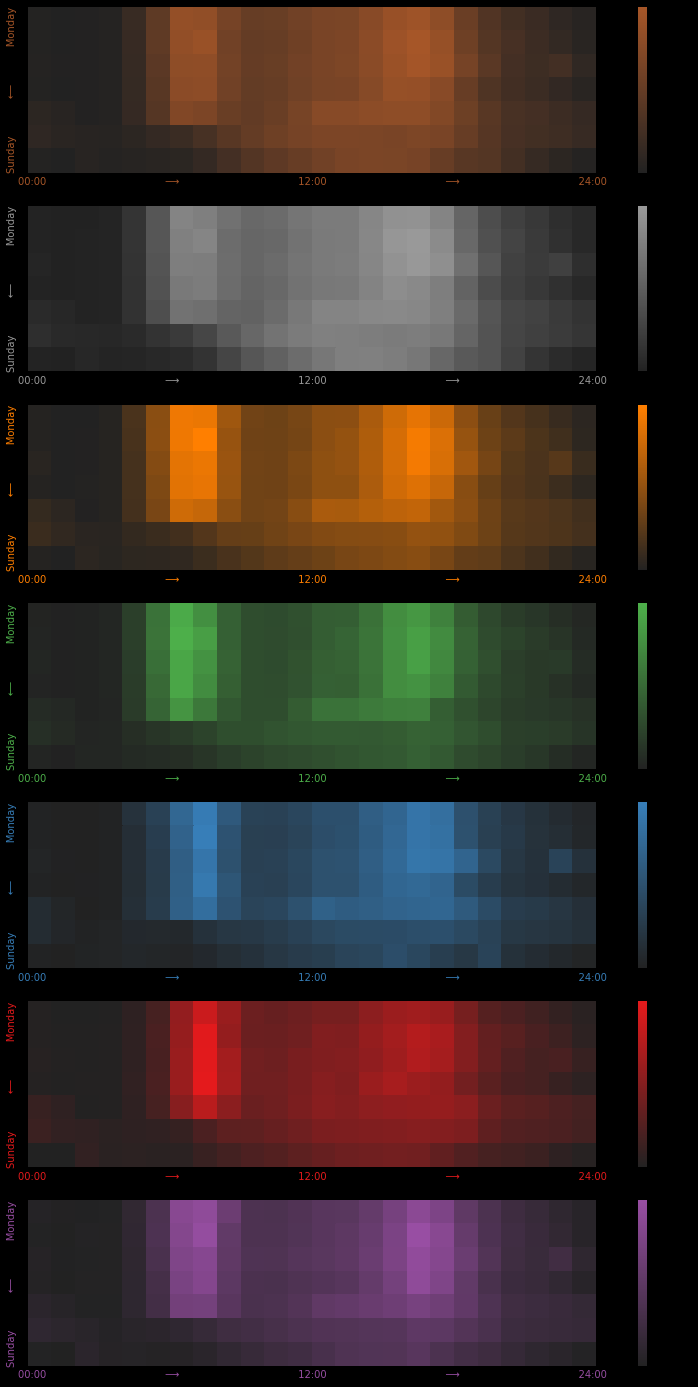

In [16]:
heatmap(True).get_figure().savefig('plots/cyclic/heatmaps/_afterDark.png', transparent=True)

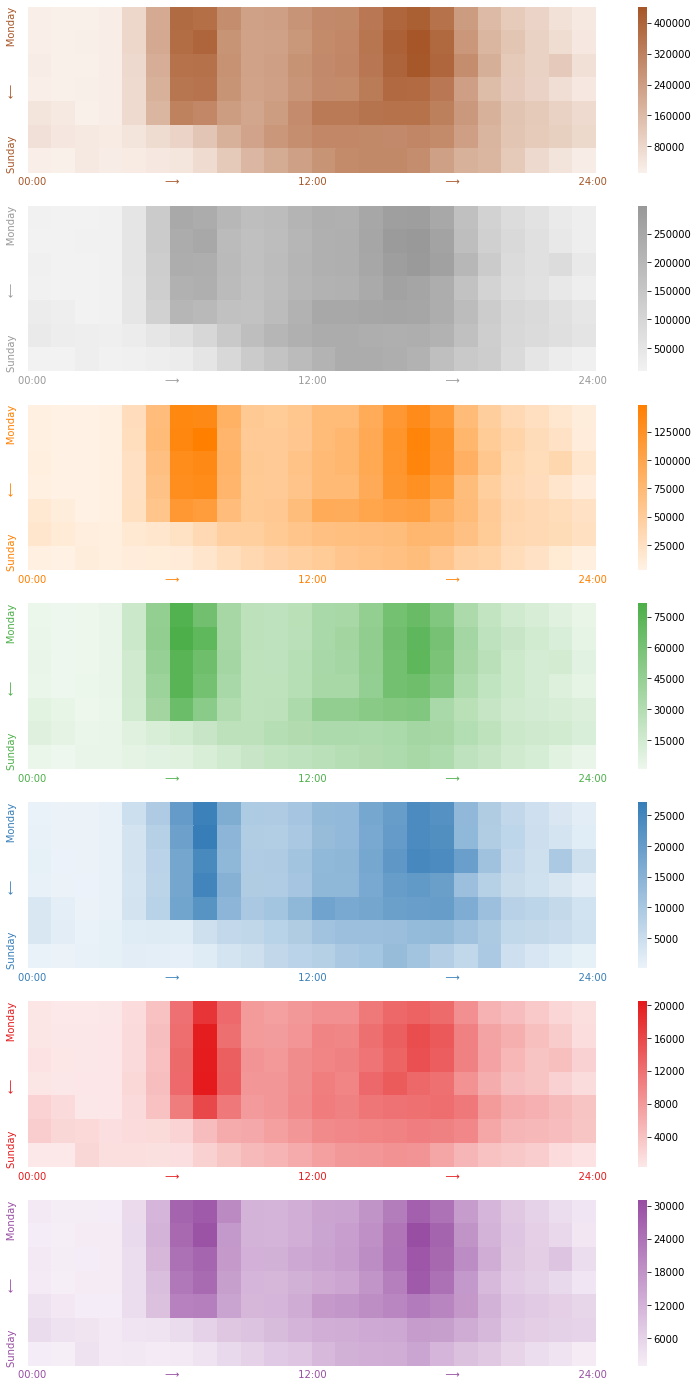

In [17]:
heatmap().get_figure().savefig('plots/cyclic/heatmaps/_afterLight.png', transparent=True)